## Visualizing Anti-aliasing Filters on Image

In [24]:
import matplotlib.pyplot as plt
from skimage import img_as_float, io
from skimage.transform import resize
from skimage.filters import gaussian
from scipy.ndimage import median_filter, uniform_filter

image = img_as_float(io.imread("mambo.jpg"))  # Use your own image

sample_rate = 0.1


Specify different anti-aliasing filters to be used

- __No Filter__:
The image is downsampled without any pre-processing. This usually results in strong aliasing artifacts (jagged edges, moiré patterns).

- __Gaussian (σ=1)__:
Applies a Gaussian blur with standard deviation σ=1. This smooths the image and reduces high-frequency details, helping to suppress aliasing when downsampling.

- __Median (3x3)__:
Applies a median filter with a 3x3 window. This filter replaces each pixel with the median value in its neighborhood, which is good for removing salt-and-pepper noise and can slightly smooth the image.

- __Mean (3x3)__:
Applies a mean (average) filter with a 3x3 window. This smooths the image by averaging the values in the neighborhood, reducing sharp transitions and high-frequency content.

In [25]:

filters = {
    "No Filter": lambda img: img,
    "Gaussian (σ=1)": lambda img: gaussian(img, sigma=1, channel_axis=-1),
    "Median (3x3)": lambda img: median_filter(img, size=(3, 3, 1)),
    "Mean (3x3)": lambda img: uniform_filter(img, size=(3, 3, 1)),
}

Apply the anti-aliasing features and show it before downsampling.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.198030811863873e-16..1.0000000000000007].


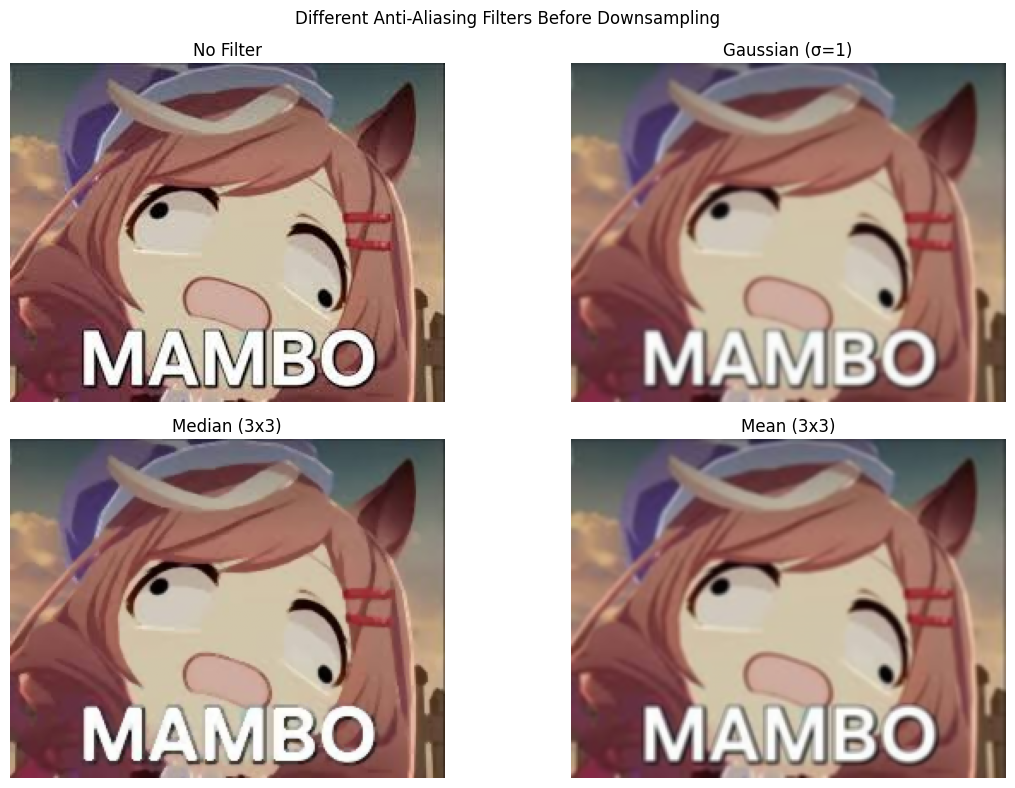

In [26]:

plt.figure(figsize=(12, 8))
for i, (name, filter_func) in enumerate(filters.items(), 1):
    # Apply filter before downsampling
    filtered = filter_func(image)
    plt.subplot(2, 2, i)
    plt.imshow(filtered)
    plt.title(name)
    plt.axis('off')
plt.suptitle("Different Anti-Aliasing Filters Before Downsampling")
plt.tight_layout()
plt.show()


Apply the filters on the image and downsample it to see it's effects on a downsampled image. Sampling rate was reduced to 10%.

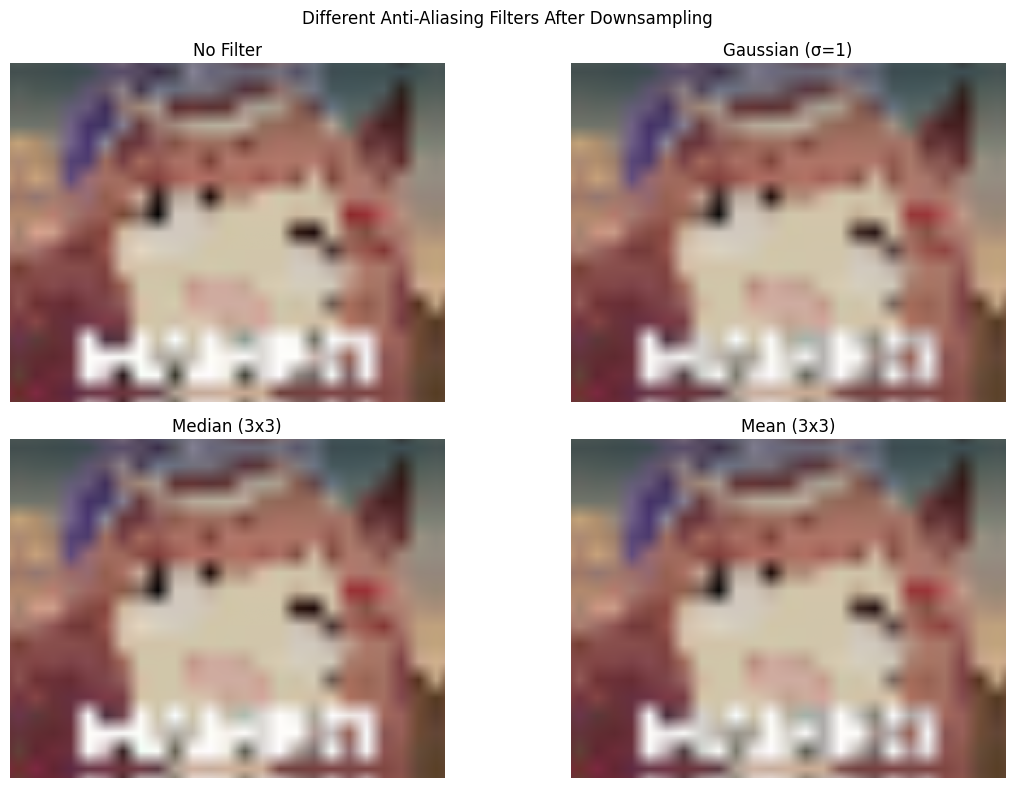

In [27]:

plt.figure(figsize=(12, 8))
for i, (name, filter_func) in enumerate(filters.items(), 1):
    # Apply filter before downsampling
    filtered = filter_func(image)
    small = resize(filtered, (int(image.shape[0]*sample_rate), int(image.shape[1]*sample_rate)),
                   anti_aliasing=False, preserve_range=True)
    # Upsample for visualization
    upsampled = resize(small, image.shape, anti_aliasing=False, preserve_range=True)
    plt.subplot(2, 2, i)
    plt.imshow(upsampled)
    plt.title(name)
    plt.axis('off')
plt.suptitle("Different Anti-Aliasing Filters After Downsampling")
plt.tight_layout()
plt.show()